**CUSTOMER BEHAVIOUR ON TOURISM**

The dataset contains information on customer behavior related to tourism, focusing on how customers interact with travel pages and engage in tourism-related activities. The data includes 17 columns and 11,760 records, capturing various aspects of customer interactions, preferences, and engagement patterns.the dataset aims to predict whether a user will take a travel-related product or service based on various behavioral and demographic factors. This makes it suitable for classification tasks, where the goal is to identify the characteristics that most influence a user's decision to engage with travel products.

1)UserID


2)Taken_product

3)Yearly_avg_view_on_travel_page



4)preferred_device:


5)total_likes_on_outstation_checkin_given:


6)yearly_avg_Outstation_checkins:

7)member_in_family:

8)preferred_location_type:


9)Yearly_avg_comment_on_travel_page:


10)total_likes_on_outofstation_checkin_received


11)week_since_last_outstation_checkin


12)following_company_page

13)montly_avg_comment_on_company_page


14)working_flag

15)travelling_network_rating


16)Adult_flag

17)Daily_Avg_mins_spend_on_traveling_page

This dataset includes a mix of numerical,categorical and boolean data types allowing various types of analysis and also some missing values

In [ ]:
#importing necessery libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.ensemble as ensm
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

In [ ]:
#load data
df=pd.read_csv('/content/drive/MyDrive/Data science/ML/project/project(tourism)/Customer behaviour Tourism.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.size

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
for i in df.columns:
  print(df[i].value_counts(),i)

In [ ]:
for i in df.columns:
  print(df[i].unique(),i)

In [ ]:
df.isnull().any()

In [ ]:
df.isnull().sum()

In [ ]:

df.isnull().sum()/len(df)*100

In [ ]:
df=df.drop(columns=['UserID','Yearly_avg_view_on_travel_page','yearly_avg_Outstation_checkins','member_in_family'])

In [ ]:
df.head()

In [ ]:

df.info()

In [ ]:
df['Taken_product'].value_counts()

In [ ]:
df['preferred_device'].value_counts()

In [ ]:
df['preferred_device'].unique()

In [ ]:
df['preferred_device'].fillna(method='bfill',inplace=True)

In [ ]:
df['preferred_device']=df['preferred_device'].replace({'Other':'Others','ANDROID':'Android','Android OS':'Android'})


In [ ]:
df['preferred_device'].isna().sum()

In [ ]:
df1=pd.get_dummies(df[['preferred_device']])

In [ ]:
df1.head()

In [ ]:
df2=pd.concat([df,df1],axis=1)

In [ ]:
df=df2.drop(['preferred_device'],axis=1)
df

In [ ]:
df.info()

In [ ]:
df['total_likes_on_outstation_checkin_given'].unique()

In [ ]:
df['total_likes_on_outstation_checkin_given'].isna().sum()

In [ ]:

#fill the missing values with the mean of the non missing values

df['total_likes_on_outstation_checkin_given']=df['total_likes_on_outstation_checkin_given'].fillna(df['total_likes_on_outstation_checkin_given'].mean())

In [ ]:
df['total_likes_on_outstation_checkin_given'].isna().sum()

In [ ]:
df['preferred_location_type'].unique()

In [ ]:
df['preferred_location_type'].fillna(method='bfill',inplace=True)

In [ ]:
df['preferred_location_type'].isna().sum()

In [ ]:
df11=pd.get_dummies(df[['preferred_location_type']])

In [ ]:
df22=pd.concat([df,df11],axis=1)

In [ ]:
df=df22.drop(['preferred_location_type'],axis=1)
df

In [ ]:
df.info()

In [ ]:
df['Yearly_avg_comment_on_travel_page'].unique()

In [ ]:
df['Yearly_avg_comment_on_travel_page'].isna().sum()

In [ ]:
df['Yearly_avg_comment_on_travel_page']=df['Yearly_avg_comment_on_travel_page'].fillna(df['Yearly_avg_comment_on_travel_page'].mean())

In [ ]:
df.info()

In [ ]:
df['following_company_page'].value_counts()

In [ ]:
df['following_company_page']=df['following_company_page'].replace({'No':'0','Yes':'1','Yeso':'1'})

In [ ]:
df['following_company_page'].isna().sum()

In [ ]:
df['following_company_page'].fillna(method='bfill',inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['following_company_page']=le.fit_transform(df.iloc[:,5])
df.head()

In [ ]:
df['working_flag'].unique()

In [ ]:
df['working_flag']=df['working_flag'].replace({'No':'0','Yes':'1'})

In [ ]:
df['working_flag']=df['working_flag'].astype(float)

In [ ]:
df['working_flag'].info()

In [ ]:
df.info()

In [ ]:
le1=LabelEncoder()
df['Taken_product']=le1.fit_transform(df.iloc[:,0])
df.head()


In [ ]:
df.info()

In [ ]:
df['Adult_flag'].unique()

In [ ]:
df['Adult_flag'].fillna(method='ffill',inplace=True)

In [ ]:
df['Daily_Avg_mins_spend_on_traveling_page'].unique()

In [ ]:
df['Daily_Avg_mins_spend_on_traveling_page'].fillna(method='ffill',inplace=True)

In [ ]:
df.isnull().sum()

checking for outliers

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
for i in df.columns:
  sns.boxplot(x=df[i])
  print(i)
  plt.show()
  print(i,'*'*100)

In [ ]:
corln=df.corr()
corln

In [ ]:
x=df.drop('Taken_product',axis=1)
y=df['Taken_product']

In [ ]:
y.value_counts()

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=2)

In [ ]:
ytrain.value_counts()

as classes have huge differencein their value therefore smotting




In [ ]:
sm=SMOTE()
xres,yres=sm.fit_resample(xtrain,ytrain)

In [ ]:
yres.value_counts()

In [ ]:
std=StandardScaler()

xtrain=std.fit_transform(xtrain)
xtest=std.fit_transform(xtest)
xres=std.fit_transform(xres)

MODEL BUILDING

In [ ]:
df

KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(xtrain,ytrain)

In [ ]:
help(knn)

In [ ]:
ypred=knn.predict(xtest)
ypred

In [ ]:
ytest.value_counts()

EVALUATION OF KNN

In [ ]:
trainscore=knn.score(xtrain,ytrain)
trainscore

In [ ]:
testscore=knn.score(xtest,ytest)
testscore

In [ ]:
metrics.accuracy_score(ypred,ytest)

In [ ]:
print(metrics.confusion_matrix(ypred,ytest))

In [ ]:
print(metrics.classification_report(ypred,ytest))

In [ ]:
metrics.mean_squared_error(ypred,ytest)

predicting


In [ ]:

data= std.transform([[44403, 29, 1,  34606,0, 9, 4,0, 1, .0,0,0,0,45,234,2234,1233,0,1,0,0,0,1,2,3,1,0,0,0,9,0,0]])
print(data)


In [ ]:
op=knn.predict(data)
op

KNN by SMOTTING

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn1.fit(xres,yres)

In [ ]:
ypred1=knn1.predict(xtest)
ypred1

Evaluation of smotted knn

In [ ]:
metrics.accuracy_score(ypred1,ytest)

In [ ]:
metrics.mean_squared_error(ypred1,ytest)

In [ ]:
metrics.confusion_matrix(ypred1,ytest)

In [ ]:
print(metrics.classification_report(ypred1,ytest))

In [ ]:
trainscore1=knn1.score(xres,yres)
trainscore1

In [ ]:
testscore1=knn1.score(xtest,ytest)
testscore1

DECISION TREE

In [ ]:
dt=DecisionTreeClassifier(max_depth=4,criterion='entropy')
dt.fit(xtrain,ytrain)

In [ ]:
ypre=dt.predict(xtest)
ypre

Evaluation

In [ ]:
trains=dt.score(xtrain,ytrain)
trains

In [ ]:
tests=dt.score(xtest,ytest)
tests

In [ ]:
metrics.accuracy_score(ypre,ytest)

In [ ]:
metrics.confusion_matrix(ypre,ytest)

In [ ]:
print(metrics.classification_report(ypre,ytest))

In [ ]:
metrics.mean_squared_error(ypre,ytest)

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(dt)

Smotted Decision tree

In [ ]:
dt1=DecisionTreeClassifier(max_depth=4,criterion='entropy')
dt1.fit(xres,yres)

In [ ]:
ypre1=dt1.predict(xtest)
ypre1

In [ ]:
trains1=dt1.score(xres,yres)
trains1

In [ ]:
tests1=dt1.score(xtest,ytest)
tests1

In [ ]:
metrics.accuracy_score(ypre1,ytest)

In [ ]:
metrics.confusion_matrix(ypre1,ytest)

In [ ]:
print(metrics.classification_report(ypre1,ytest))

In [ ]:
metrics.mean_squared_error(ypre1,ytest)

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(dt1)

LOGISTIC REGRESSION

In [ ]:
logr=LogisticRegression()
logr.fit(xtrain,ytrain)

In [ ]:
ypr=logr.predict(xtest)
ypr

In [ ]:
trainsc=logr.score(xtrain,ytrain)
trainsc

In [ ]:
testsc=logr.score(xtest,ytest)
testsc

In [ ]:
metrics.accuracy_score(ypr,ytest)

In [ ]:
metrics.confusion_matrix(ypr,ytest)

In [ ]:
print(metrics.classification_report(ypr,ytest))

In [ ]:
metrics.mean_squared_error(ypr,ytest)

Smotted Logistic Refression

In [ ]:
logr1=LogisticRegression()
logr1.fit(xres,yres)

In [ ]:
ypr1=logr1.predict(xtest)
ypr1

In [ ]:
trainsc1=logr1.score(xres,yres)
trainsc1

In [ ]:
testsc1=logr1.score(xtest,ytest)
testsc1

In [ ]:
metrics.accuracy_score(ypr1,ytest)

In [ ]:
metrics.confusion_matrix(ypr1,ytest)

In [ ]:
print(metrics.classification_report(ypr1,ytest))

In [ ]:
metrics.mean_squared_error(ypr1,ytest)

NAIVE BAYE'S

In [ ]:
nb=GaussianNB()
nb.fit(xtrain,ytrain)

In [ ]:
yprr=nb.predict(xtest)
yprr

In [ ]:
trainee=nb.score(xtrain,ytrain)
trainee


In [ ]:
testee=nb.score(xtest,ytest)
testee

In [ ]:
naive_ac=metrics.accuracy_score(yprr,ytest)
naive_ac

In [ ]:
metrics.confusion_matrix(yprr,ytest)


In [ ]:
print(metrics.classification_report(yprr,ytest))

In [ ]:
metrics.mean_squared_error(yprr,ytest)

Smotted Naive bayes

In [ ]:
nb1=GaussianNB()
nb1.fit(xres,yres)

In [ ]:
yprr1=nb1.predict(xtest)
yprr1

In [ ]:
trainee1=nb1.score(xres,yres)
trainee1

In [ ]:
testee1=nb1.score(xtest,ytest)
testee1

In [ ]:
metrics.confusion_matrix(yprr1,ytest)


In [ ]:
print(metrics.classification_report(yprr1,ytest))

In [ ]:
metrics.mean_squared_error(yprr1,ytest)

Bernoulli

In [ ]:
model=BernoulliNB()
model.fit(xtrain,ytrain)

In [ ]:
yprb=model.predict(xtest)
yprb

In [ ]:
bernoulli_ac=metrics.accuracy_score(yprb,ytest)
bernoulli_ac

In [ ]:
print(metrics.classification_report(ytest,yprb))

In [ ]:

print(metrics.confusion_matrix(ytest,yprb))

In [ ]:
metrics.mean_squared_error(yprb,ytest)

In [ ]:
training_score=model.score(xtrain,ytrain)
training_score


In [ ]:
testing_score=model.score(xtest,ytest)
testing_score

Smotted bernoulli

In [ ]:
model1=BernoulliNB()
model1.fit(xres,yres)


In [ ]:



yprb1=model1.predict(xtest)
yprb1

In [ ]:
metrics.accuracy_score(yprb1,ytest)

In [ ]:
print(metrics.classification_report(ytest,yprb1))

In [ ]:
print(metrics.confusion_matrix(ytest,yprb1))

In [ ]:

metrics.mean_squared_error(yprb1,ytest)

In [ ]:
training_score1=model1.score(xres,yres)
training_score1

In [ ]:
testing_score1=model1.score(xtest,ytest)
testing_score1

SVM


linear

In [ ]:
svc=SVC(kernel='linear')
svc.fit(xtrain,ytrain)

In [ ]:
y1=svc.predict(xtest)
y1

In [ ]:
tr1 = svc.score(xtrain,ytrain)
tr1

In [ ]:
ts1=svc.score(xtest,ytest)
ts1

In [ ]:
svm_linear_ac=metrics.accuracy_score(y1,ytest)
svm_linear_ac

In [ ]:
metrics.confusion_matrix(y1,ytest)

In [ ]:
print(metrics.classification_report(y1,ytest))

In [ ]:
metrics.mean_squared_error(y1,ytest)

smotted linear

In [ ]:
svc1=SVC(kernel='linear')
svc1.fit(xres,yres)

In [ ]:
y11=svc1.predict(xtest)
y11

In [ ]:
tr11 = svc1.score(xres,yres)
tr11

In [ ]:
ts11=svc1.score(xtest,ytest)
ts11

In [ ]:
metrics.accuracy_score(y11,ytest)

In [ ]:
metrics.confusion_matrix(y11,ytest)

In [ ]:
print(metrics.classification_report(y11,ytest))

In [ ]:



metrics.mean_squared_error(y11,ytest)

poly

In [ ]:
ply=SVC(kernel='poly')
ply.fit(xtrain,ytrain)

In [ ]:
y2=ply.predict(xtest)
y2

In [ ]:
poly_ac=metrics.accuracy_score(y2,ytest)
poly_ac

In [ ]:
metrics.confusion_matrix(ytest,y2)

In [ ]:
print(metrics.classification_report(ytest,y2))

In [ ]:
metrics.mean_squared_error(y2,ytest)

In [ ]:
tr2=ply.score(xtrain,ytrain)
tr2

In [ ]:

ts2=ply.score(xtest,ytest)
ts2

#smotted poly

In [ ]:
ply1=SVC(kernel='poly')
ply1.fit(xres,yres)

In [ ]:
y22=ply1.predict(xtest)
y22

In [ ]:
metrics.accuracy_score(y22,ytest)

In [ ]:
metrics.confusion_matrix(ytest,y22)

In [ ]:

print(metrics.classification_report(y22,ytest))

In [ ]:

metrics.mean_squared_error(y22,ytest)

In [ ]:
tr22=ply1.score(xres,yres)
tr22

In [ ]:
ts22=ply1.score(xtest,ytest)
ts22

#sigmoid

In [ ]:

svc3=SVC(kernel='sigmoid')
svc3.fit(xtrain,ytrain)

In [ ]:
y3=svc3.predict(xtest)
y3

In [ ]:
metrics.accuracy_score(y3,ytest)

In [ ]:
metrics.confusion_matrix(ytest,y3)

In [ ]:
print(metrics.classification_report(ytest,y3))

In [ ]:
tr3=svc3.score(xtrain,ytrain)
tr3

In [ ]:

ts3=svc3.score(xtest,ytest)
ts3

In [ ]:
metrics.mean_squared_error(y3,ytest)

#smotted sigmoid

In [ ]:
svc33=SVC(kernel='sigmoid')
svc33.fit(xres,yres)

In [ ]:
y33=svc33.predict(xtest)
y33

In [ ]:
metrics.accuracy_score(y33,ytest)

In [ ]:
metrics.confusion_matrix(ytest,y33)

In [ ]:
print(metrics.classification_report(ytest,y33))

In [ ]:
tr33=svc33.score(xres,yres)
tr33

In [ ]:
ts33=svc33.score(xtest,ytest)
ts33

In [ ]:




metrics.mean_squared_error(y33,ytest)

#rbf

In [ ]:
svc4=SVC(kernel='rbf')
svc4.fit(xtrain,ytrain)

In [ ]:
y4=svc4.predict(xtest)
y4

In [ ]:
print(metrics.classification_report(ytest,y4))

In [ ]:
metrics.confusion_matrix(y4,ytest)

In [ ]:
rbf_ac=metrics.accuracy_score(y4,ytest)
rbf_ac

In [ ]:
metrics.mean_squared_error(y4,ytest)

In [ ]:
tr4=svc4.score(xtrain,ytrain)
tr4

In [ ]:
ts4=svc4.score(xtest,ytest)
ts4

#smotted rbf

In [ ]:
svc44=SVC(kernel='rbf')
svc44.fit(xres,yres)

In [ ]:
y44=svc44.predict(xtest)
y44

In [ ]:
print(metrics.classification_report(ytest,y44))

In [ ]:
metrics.confusion_matrix(y44,ytest)

In [ ]:
metrics.accuracy_score(y44,ytest)

In [ ]:
metrics.mean_squared_error(y44,ytest)

In [ ]:
tr44=svc44.score(xres,yres)
tr44

In [ ]:
ts44=svc44.score(xtest,ytest)
ts44

ENSEMBLE LEARNING

BAGGING

Random forest

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,max_features=5)
rfc.fit(xtrain,ytrain)

In [ ]:
help(rfc)

In [ ]:
rpred=rfc.predict(xtest)
rpred

In [ ]:
rtraining_score=rfc.score(xtrain,ytrain)
rtraining_score

In [ ]:
rtesting_score=rfc.score(xtest,ytest)
rtesting_score

In [ ]:
bagging_ac=metrics.accuracy_score(ytest,rpred)
bagging_ac

In [ ]:
print(metrics.classification_report(ytest,rpred))

In [ ]:

metrics.confusion_matrix(rpred,ytest)

In [ ]:
metrics.mean_squared_error(rpred,ytest)

smotted bagging

In [ ]:
rfc1=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,max_features=5)
rfc1.fit(xres,yres)

In [ ]:
rpred1=rfc1.predict(xtest)
rpred1

In [ ]:
rtraining_score1=rfc1.score(xres,yres)
rtraining_score1

In [ ]:
rtesting_score1=rfc1.score(xtest,ytest)
rtesting_score1

In [ ]:
metrics.accuracy_score(ytest,rpred1)

In [ ]:
print(metrics.classification_report(ytest,rpred1))

In [ ]:

metrics.confusion_matrix(rpred1,ytest)

In [ ]:
metrics.mean_squared_error(rpred1,ytest)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

labels=['Yes','No']
cm=confusion_matrix(ytest,rpred1)
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

#boosting

In [ ]:
adb=ensm.AdaBoostClassifier(n_estimators=10)
adb.fit(xtrain,ytrain)

In [ ]:
help(adb)

In [ ]:
apred=adb.predict(xtest)
apred

In [ ]:
boosting_ac=metrics.accuracy_score(ytest,apred)
boosting_ac

In [ ]:
print(metrics.classification_report(ytest,apred))

In [ ]:
atraining_score=adb.score(xtrain,ytrain)
atraining_score

In [ ]:
atesting_score=adb.score(xtest,ytest)
atesting_score

In [ ]:
metrics.confusion_matrix(ytest,apred)

In [ ]:
mse=metrics.mean_squared_error(ytest,apred)
mse

smotted boosting

In [ ]:
adb1=ensm.AdaBoostClassifier(n_estimators=10)
adb1.fit(xres,yres)

In [ ]:
apred1=adb1.predict(xtest)
apred1

In [ ]:
metrics.accuracy_score(ytest,apred1)

In [ ]:
print(metrics.classification_report(ytest,apred1))

In [ ]:
atraining_score1=adb1.score(xres,yres)
atraining_score1

In [ ]:
atesting_score1=adb1.score(xtest,ytest)
atesting_score1

In [ ]:
metrics.confusion_matrix(ytest,apred1)

In [ ]:
mse=metrics.mean_squared_error(ytest,apred)
mse

In [ ]:
import matplotlib.pyplot as plt



model_names = [ 'Naive Bayes','Bernoulli','SVM-linear','SVM-poly','SVM-rbf','bagging','boosting']
accuracies = [naive_ac,bernoulli_ac,svm_linear_ac,poly_ac,rbf_ac,bagging_ac,boosting_ac]

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # To ensure y-axis starts from 0
plt.show()

RESULTS

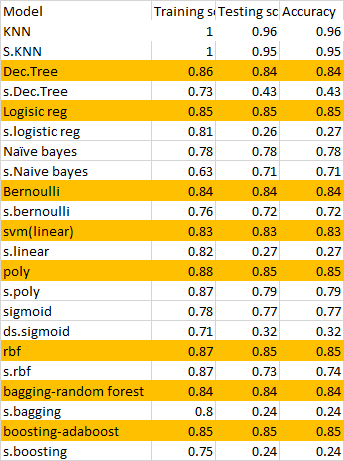

HYPER PARAMETER TUNING


Grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
cls1=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}

clf=GridSearchCV(cls1,params,cv=10,scoring='accuracy')
clf.fit(xtrain,ytrain)

In [ ]:
clf.best_params_

In [ ]:
clf2=KNeighborsClassifier(n_neighbors=3,weights='distance')
clf2.fit(xtrain,ytrain)
y_pred=clf2.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred)

No change

Randomized search cv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

In [ ]:
clf = RandomForestClassifier(n_estimators=50)

In [ ]:
clf.fit(xtrain,ytrain)

In [ ]:

ypred_7 = clf.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

In [ ]:
param_dist = {'max_depth':[3,4,5,6,7,8],
              'max_features':sp_randint(1,11),
              'min_samples_split':sp_randint(2,11),
              'criterion':['gini','entropy']}

In [ ]:
clf1 = RandomForestClassifier(n_estimators=50)

In [ ]:
randomCV = RandomizedSearchCV(clf1,param_distributions=param_dist,cv=10)

In [ ]:
randomCV.fit(xtrain,ytrain)
print(randomCV.best_params_)

In [ ]:
print(randomCV.score(xtest,ytest))

In [ ]:
clf2 = RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=7,max_features=10,min_samples_split=4)

In [ ]:
clf2.fit(xtrain,ytrain)
y_pred = clf2.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

Accuracy improved from 0.86 in to 0.96

Streamlit

In [ ]:
import pickle
pickle.dump(logr,open('modell.sav','wb'))

In [ ]:
import pickle
pickle.dump(std,open('scalerr.sav','wb'))